<IPython.core.display.Javascript object>


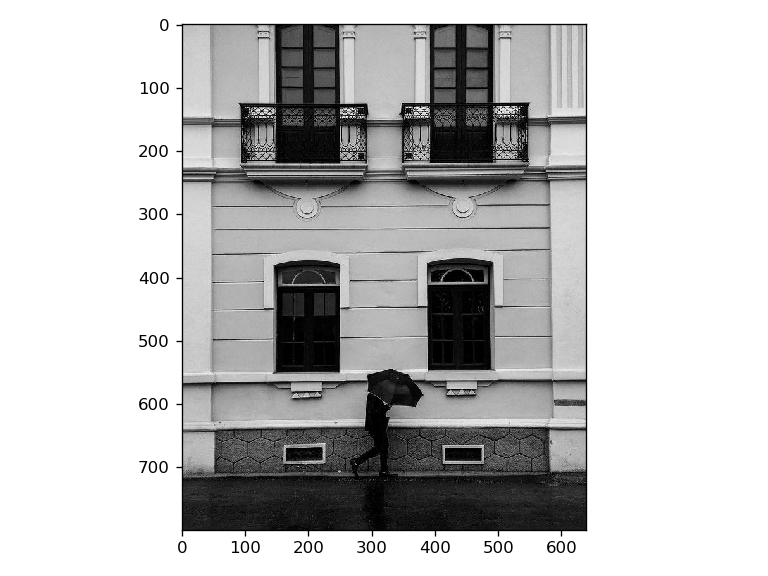

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow

im = imread('walking.jpg')
plt.figure()
imshow(im)
plt.show()

# Co-occurrence matrix


$$C_{\Delta x, \Delta y}(i,j) = \sum_{x=0}^{n-1} \sum_{y=0}^{m-1} 
\begin{cases} 1, & \text{if }I(x, y)=i\text{ and }I(x+\Delta x, y+\Delta y)=j \\ 
0, & \text{otherwise}\end{cases}$$

If $C_{5,10}(200,20) = N$, it means that, in the image, there are $N$ occurrences of a pixel with a value of 200 and a pixel with a value of 20 such that their position are $(x,y)$ and $(x+5,y+10)$.

<IPython.core.display.Javascript object>


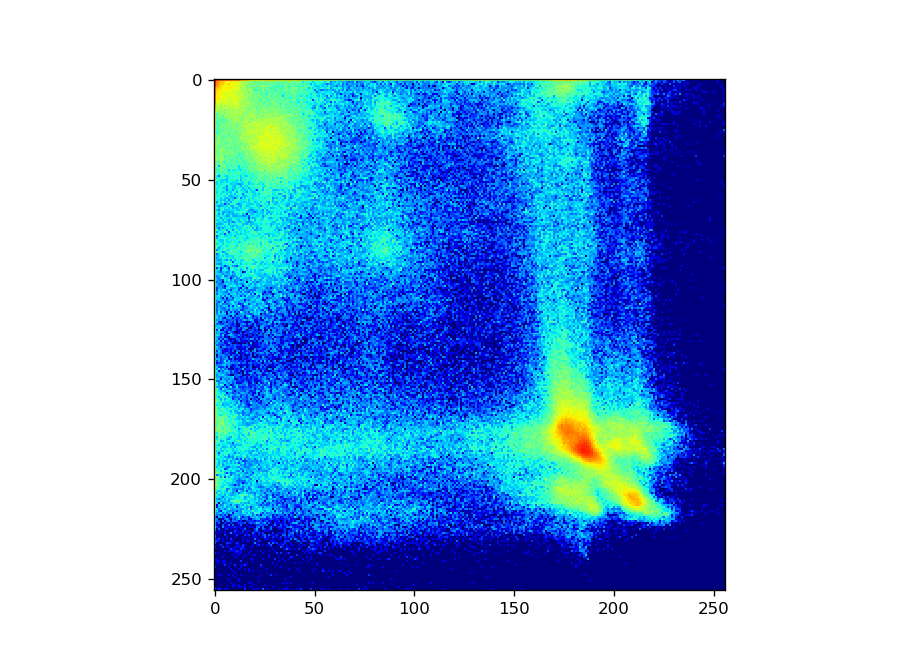

In [61]:
def log_nz(M):
    M2 = M.copy()
    M2[M==0] = 0.5
    return np.log(M2)

dy = 20
dx = 20

C = np.zeros((256,256))
for y in range(im.shape[0]-dy):
    for x in range(im.shape[1]-dx):
        i = im[y,x]
        j = im[y+dy, x+dx]
        C[i,j] += 1

plt.figure()
plt.imshow(log_nz(C), plt.cm.jet)
plt.show()


<IPython.core.display.Javascript object>


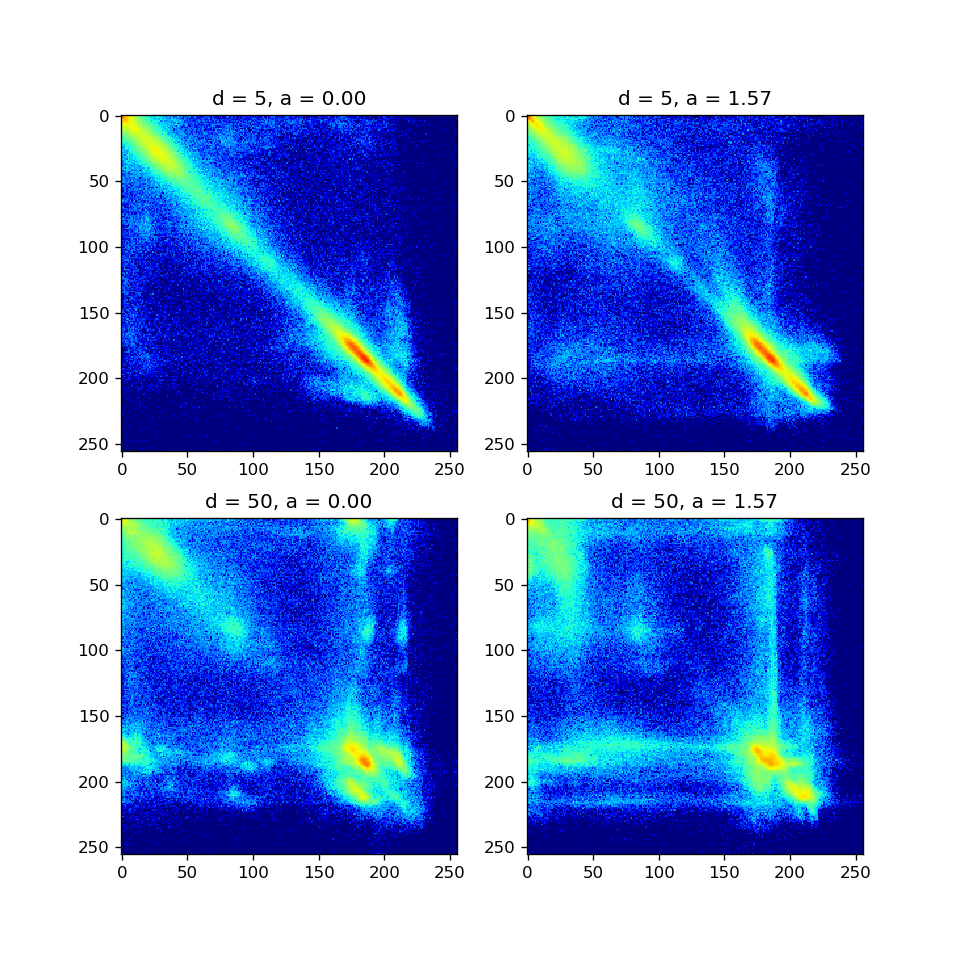

In [63]:
from skimage.feature import greycomatrix

distances = [5,50] # Distances in pixels that we want to check
angles = [0, np.pi/2] # Angles in radians that we want to check

co_matrices = log_nz(greycomatrix(im, distances, angles).astype('float'))

plt.figure(figsize=(8,8))
i = 1
for idd,d in enumerate(distances):
    for ida,a in enumerate(angles):
        C = co_matrices[:,:,idd,ida]
        plt.subplot(2,2,i)
        plt.imshow(C, vmin=co_matrices.min(), vmax=co_matrices.max(), cmap=plt.cm.jet) # Give the same scale to all images!
        plt.title('d = %d, a = %.2f'%(d,a))
        i += 1
plt.show()

<IPython.core.display.Javascript object>


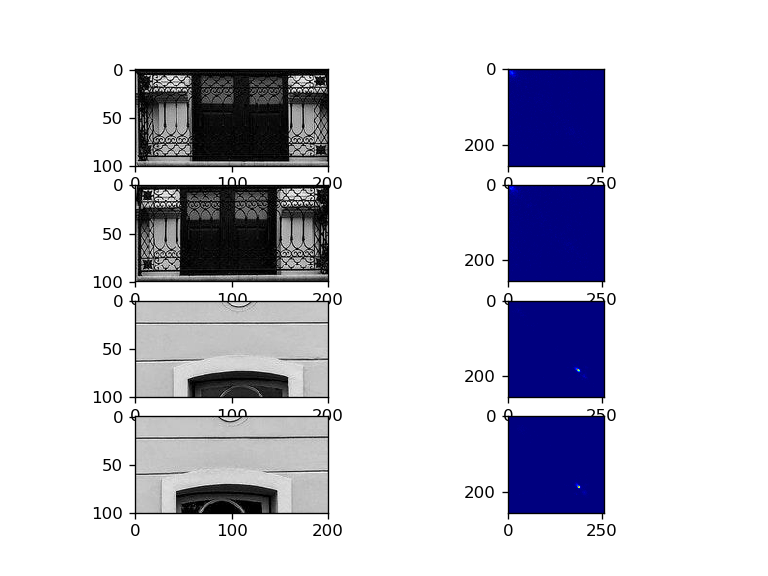

<IPython.core.display.Javascript object>


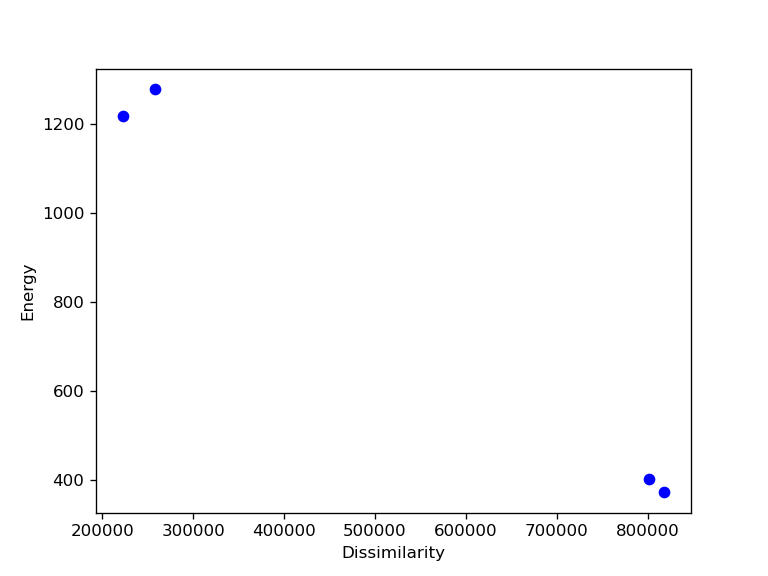

In [64]:
from skimage.feature import greycoprops

gridA = im[125:225,90:290]
gridB = im[125:225,345:545]
wallA = im[300:400,90:290]
wallB = im[300:400,345:545]
patches = [gridA,gridB,wallA,wallB]

plt.figure()
all_props = np.zeros((len(patches),2))
for i,patch in enumerate(patches):
    co_matrices = greycomatrix(patch, [10], [0])
    
    plt.subplot(len(patches),2,i*2+1)
    plt.imshow(patch, cmap=plt.cm.gray)
    
    plt.subplot(len(patches),2,i*2+2)
    gcm = co_matrices[:,:,0,0]
    plt.imshow(gcm, cmap=plt.cm.jet)
    
    all_props[i,0] = greycoprops(co_matrices, prop='dissimilarity')[0][0]
    all_props[i,1] = greycoprops(co_matrices, prop='energy')[0][0]
    
plt.figure()
plt.plot(all_props[:,0], all_props[:,1], 'bo')
plt.xlabel('Dissimilarity')
plt.ylabel('Energy')
plt.show()